# This notebook trains the CNN model

## First we transform the training images into a 4D array

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import PIL
import pandas as pd
from PIL import Image
from tqdm import tqdm
os.environ['KMP_DUPLICATE_LIB_OK']='True'

PATH = os.getcwd()


### Returns all filenames in a directory

In [2]:
def mylistdir(directory):
    """A specialized version of os.listdir() that ignores files that
    start with a leading period."""
    filelist = os.listdir(directory)
    return [x for x in filelist
            if not (x.startswith('.'))]



### Initializes a side length of 50 pixels

In [3]:
allImg = []


In [4]:
df = pd.read_excel("../../Pokemon_Classifications_2.xlsx")
matrix = df.values
matrix

array([[1, 'Bulbasaur', 'Grass', 'Poison', nan, nan],
       [2, 'Ivysaur', 'Grass', 'Poison', nan, nan],
       [3, 'Venosaur', 'Grass', 'Poison', nan, nan],
       ...,
       [720, 'Hoopa', 'Psychic', 'Ghost', nan, nan],
       ['720-unbound', 'Hoopa (unbound)', 'Psychic', 'Dark', nan, nan],
       [721, 'Volcanion', 'Fire', 'Water', nan, nan]], dtype=object)

In [5]:
lookup = {}
for pokemon in matrix: 
    my_type = pokemon[2]
    my_num = str(pokemon[0])
    lookup[my_num] = my_type
    


### Flatten all images in the folder

  0%|          | 0/5784 [00:00<?, ?it/s]

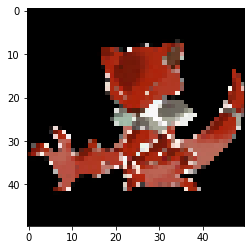

  0%|          | 1/5784 [00:00<11:49,  8.15it/s]

Psychic


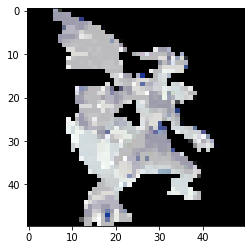

  0%|          | 2/5784 [00:00<11:56,  8.07it/s]

Dragon


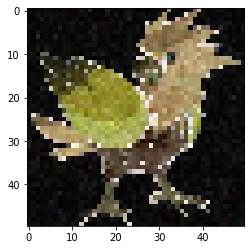

Flying


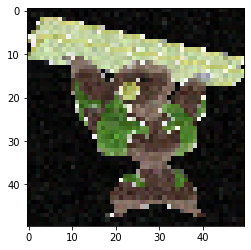

  0%|          | 4/5784 [00:00<11:24,  8.44it/s]

Fighting


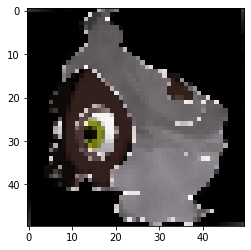

Ghost


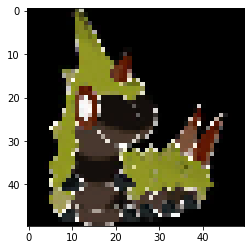

  0%|          | 6/5784 [00:00<10:33,  9.13it/s]

Bug


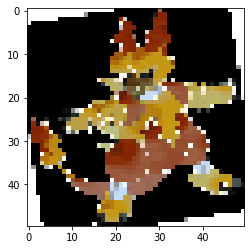

  0%|          | 7/5784 [00:00<11:13,  8.58it/s]

Fire


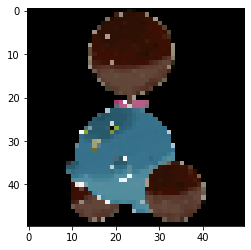

  0%|          | 8/5784 [00:00<13:50,  6.96it/s]

Grass


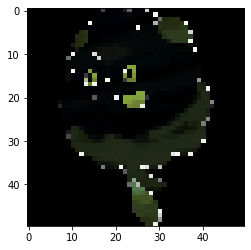

  0%|          | 9/5784 [00:01<13:24,  7.17it/s]

Fairy


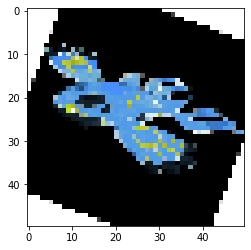

100%|██████████| 5784/5784 [00:01<00:00, 4681.08it/s]

Water


In [11]:
SIDE = 50
count = 0
allImg = []
allLabels = []
fileNames = mylistdir(os.path.join(PATH, "../../../TrainingData/TrainingData"))


#fileNames.sort(key=lambda f: int(filter(str.isdigit, f)))
#print(fileNames)
for img in tqdm(fileNames):
    #print(img)
    if count < 10: 
        #print(img)
        #print(count)
        path = os.path.join(PATH, "../../../TrainingData/TrainingData")
        #print(img)
        img_array = cv2.imread(os.path.join(path, img))
        #plt.imshow(img_array, cmap="gray")
        img_array = 1 - img_array/255.0
        #print(img_array)
        img_array = cv2.resize(img_array, (SIDE, SIDE))
        plt.imshow(img_array, cmap="gray")
        allImg.append(img_array)
        plt.show()
        #results = model.predict(test_images)
        
        loc = img.find(".jpg")
        allLabels.append(lookup[img[0:loc]])
        print(lookup[img[0:loc]])
        count += 1

### Add all images into an array to form the 4D training set

In [16]:
trainArray = np.concatenate([arr[np.newaxis] for arr in allImg])
trainArray.shape

(10, 50, 50, 3)